In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

In [3]:
# 현재 경로
os.getcwd()

'C:\\Users\\sunkeun_jo\\Desktop\\pattern_recognition'

In [6]:
# 데이터 불러오기 
from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['target']=boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
target=df[['target']]
crim=df[['CRIM']]
rm=df[['RM']]
lstat=df[['LSTAT']]

단순 선형회귀 : 상수항 추가 -> 모델에 피팅 -> 결과 확인 -> PREDICT

# 다중선형회귀 

## CRIM,RM, LSTAT 세 개의 변수를 통해 다중회귀 적합

In [9]:
## boston data에서 crim,rm, lstat변수만 뽑아오기 
x_data=df.loc[:,["RM","CRIM","LSTAT"]]
x_data.head()

,RM,CRIM,LSTAT
0,6.575,0.00632,4.98
1,6.421,0.02731,9.14
2,7.185,0.02729,4.03
3,6.998,0.03237,2.94
4,7.147,0.06905,5.33


In [10]:
# 상수항 추가 
x_data1=sm.add_constant(x_data,has_constant="add")
x_data1.head()

,const,RM,CRIM,LSTAT
0,1.0,6.575,0.00632,4.98
1,1.0,6.421,0.02731,9.14
2,1.0,7.185,0.02729,4.03
3,1.0,6.998,0.03237,2.94
4,1.0,7.147,0.06905,5.33


In [11]:
#회귀 모델 적합 
x_model1=sm.OLS(target,x_data1)
fitted_model1=x_model1.fit()

In [12]:
#summary
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.01e-112
Time:                        21:26:54   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
RM             5.2170      0.442     11.802      0.000       4.348       6.085
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 단순 선형회귀 모델의 회귀 계수와 비교 ( 단순선형회귀 파트에서 보십시요!)

In [13]:
fitted_model1.params

const   -2.562251
RM       5.216955
CRIM    -0.102941
LSTAT   -0.578486
dtype: float64

crim 의 경우 -0.4 rm 의경우 9, lstat일 경우 -0.95 였는데 위와 같게 바뀌었다. 그리고 R-squared의 경우 64.6%의 설명력을 가지게 되었다.(변수가 많아지면 보통 늘어나게 됩니다) -> 회귀계수의 영향력들이 줄어들어 다중공산성의 문제가 발생한다.(그렇지만 각 계수들의 pvalue가 굉장히 낮기 때문에 다중공산성은 있지만 써도 될 것 같다라는 해석이 가능하게 된다.)  


# 행렬 연산을 통한 beta 구하기 

In [16]:
from numpy import linalg ## 행렬 연산을 통해 beta 구하기 (X'X)-1X'y

ba=linalg.inv(np.dot(x_data1.T,x_data1))# 역행렬 np function 
beta=np.dot(np.dot(ba,x_data1.T),target)
beta # 위의 summary와 일치하게 된다.

array([[-2.56225101],
       [ 5.21695492],
       [-0.10294089],
       [-0.57848582]])

In [18]:
# y_hat 구하기 
pred1=fitted_model1.predict(x_data1)

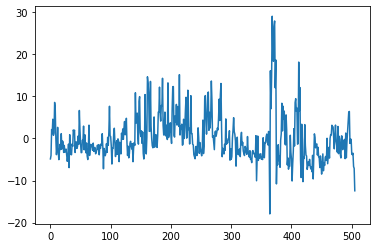

In [19]:
fitted_model1.resid.plot(label="full")
plt.show()